<a href="https://colab.research.google.com/github/Anamika-Thakur/DSA-assignments/blob/main/YoSegregato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tqdm
import matplotlib.pyplot as plt
from keras import preprocessing, layers, models, optimizers
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
FAST_RUN = False

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
len(model.layers)

2

In [ ]:
# Import the necessary modules
import tensorflow as tf

# Define a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on some data
model.build(input_shape=(1,10))
# ...

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 10)                   110       
                                                                 
 dense_1 (Dense)             (1, 1)                    11        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
import cv2

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/waste-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall("destination_folder")

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/waste-dataset.zip
/content/drive/MyDrive/Screenshot_20240331-003140_Chrome.jpg
/content/drive/MyDrive/YoSegregato.ipynb


In [ ]:
import glob
import tqdm
import cv2
import pandas as pd

In [ ]:
test_path = "/content/destination_folder/DATASET/TEST"
train_path = "/content/destination_folder/DATASET/TRAIN"

In [ ]:
from collections import Counter
Counter(y_data)

Counter()

In [ ]:
className = glob.glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


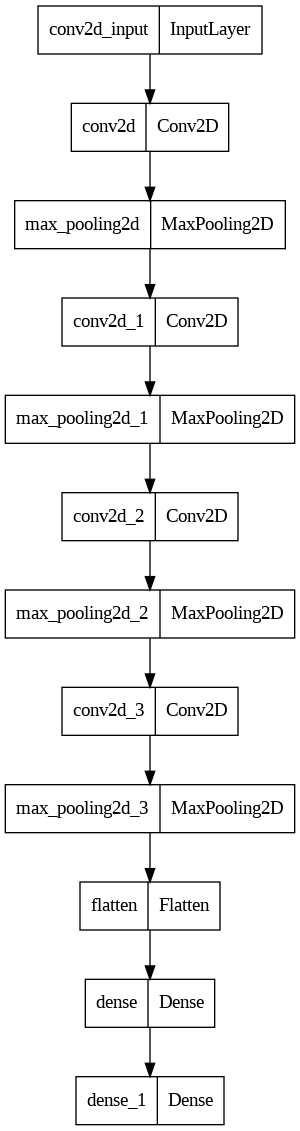

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = 6272,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = 6272,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Import necessary modules
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the training data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150)
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=11,
        validation_data = test_generator)

<ipython-input-35-d5cc49db93d2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/11
 25/706 [>.............................] - ETA: 20:05 - loss: 0.3238 - accuracy: 0.8637

PREDICTION


In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

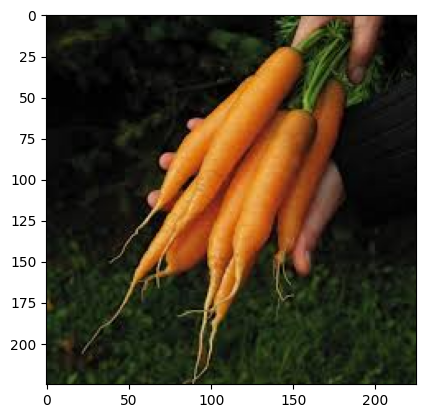

In [ ]:
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/destination_folder/DATASET/TEST/O/O_12569.jpg")

# Convert BGR to RGB color space
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
img = load_img("/content/destination_folder/DATASET/TEST/O/O_12569.jpg", target_size=(224, 224))
img_array = img_to_array(img)
cropped_img = img_array[0:150, 37:187]
result = np.argmax(model.predict(np.expand_dims(cropped_img, axis=0)))

1/1 [==============================] - 0s 127ms/step
